In [62]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [63]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [64]:
classes = []

with open("./coco.names","r") as f:
    classes = f.read().splitlines()

In [65]:
len(classes)

80

In [66]:
img = cv2.imread("./street.jpg")

blob = cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [67]:
blob.shape

(1, 3, 320, 320)

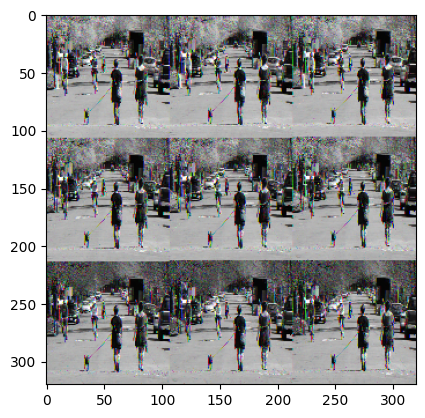

In [68]:
# to print image
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [69]:
yolo.setInput(blob)

In [70]:
output_layer_names = yolo.getUnconnectedOutLayersNames()
layeroutputs = yolo.forward(output_layer_names)

In [73]:
boxes = []
confidences = []
class_ids = []

width = img.shape[1]  # Get the width of the image
height = img.shape[0]  # Get the height of the image

for output in layeroutputs:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)

            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [74]:
len(boxes)

2

In [75]:
#from operator import index
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [76]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))

In [78]:
if indexes is not None and len(indexes) > 0:
    indexes = np.array(indexes)
    for i in indexes.flatten():
        x,y,w,h = boxes[i]

        label = str(classes[class_ids[i]])
        confi = str(round(confidences[i], 2))
        color = colors[i]

        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        cv2.putText(img, label +" "+confi, (x,y+20), font ,1 ,(255,255,255), 2)
else:
    print("No detections found") # Handle the case where no boxes are detected



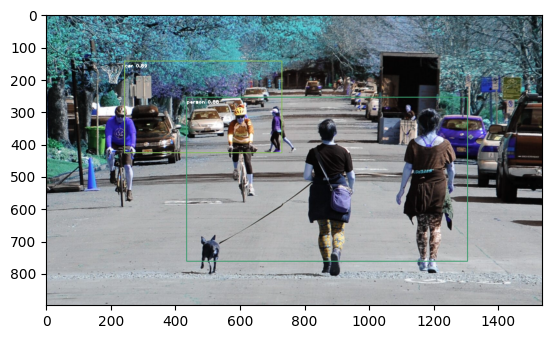

In [79]:
plt.imshow(img)

In [80]:
cv2.imwrite("output.jpg",img)

True